# Demonstration of API using OpenWeatherMap.org
This demonstration is heavily inspired by [NeuralNine's video](https://www.youtube.com/watch?v=9P5MY_2i7K8).  
You need a free account [from here](https://openweathermap.org/api).  
The VS Code extension _JSON viewer_ is recommended for viewing downloaded JSON content.  
  - Set your maximum API calls to 1000 per day to make sure you are under the limit for billing. 
  - To run the examples, download your API key, save it in the right folder (see below) in a file called _api\_key\_OpenWeather_, containing only the key (no spaces or "enters").

In [1]:
# Imports
import datetime as dt
import requests
import json

## Current weather
### Common definitions to use for all requests

In [2]:
BASE_URL = "http://api.openweathermap.org/data/2.5/weather?"
API_KEY = open('../../../No_sync/api_key_OpenWeather','r').read()
CITY = "Ski"

url = BASE_URL + "q=" + CITY + "&appid=" + API_KEY

## Request current weather in chosen city

In [3]:
response = requests.get(url).json()
print(response)

{'coord': {'lon': 10.8358, 'lat': 59.7195}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 281.84, 'feels_like': 281.84, 'temp_min': 278.66, 'temp_max': 283.2, 'pressure': 1025, 'humidity': 95, 'sea_level': 1025, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 1.32, 'deg': 205, 'gust': 3.03}, 'clouds': {'all': 87}, 'dt': 1727685391, 'sys': {'type': 2, 'id': 2006772, 'country': 'NO', 'sunrise': 1727673608, 'sunset': 1727715169}, 'timezone': 7200, 'id': 3139081, 'name': 'Ski', 'cod': 200}


In [4]:
# Write JSON to file for viewing
with open('downloads/weather.json', 'w') as f:
    json.dump(response, f, indent=4)

## Conversion functions
Changing scales can make results more interpretable

In [5]:
# Kelvin to Celsius
def kelvin_to_celsius(temp):
    return temp - 273.15

# Meters per second to knots
def mps_to_knots(speed):
    return speed * 1.943844

## Print some weather properties

In [10]:
# Current temperature
temp_kelvin = response['main']['temp']
temp_celsius = kelvin_to_celsius(temp_kelvin)
print(f"The current temperature in {CITY} is {temp_celsius:.1f} °C")

The current temperature in Ski is 8.7 °C


In [8]:
# Sunrise and sunset today in local time
sunrise = dt.datetime.fromtimestamp(response['sys']['sunrise'])
sunset = dt.datetime.fromtimestamp(response['sys']['sunset'])
print(f"Sunrise today is at {sunrise:%H:%M} and sunset is at {sunset:%H:%M}")

Sunrise today is at 07:20 and sunset is at 18:52


In [9]:
# Wind direction and speed
wind_knots = mps_to_knots(response['wind']['speed'])
print(f"Wind today is from {response['wind']['deg']}° at {round(wind_knots,1)} knots")

Wind today is from 205° at 2.6 knots


## Forecasted weather
### Common definitions to use for all requests

In [33]:
BASE_URL = "https://api.openweathermap.org/data/2.5/forecast?"
CITY = "Mo i Rana"

urlF = BASE_URL + "q=" + CITY + "&appid=" + API_KEY

## Request forecasted weather in chosen city

In [34]:
responseF = requests.get(urlF).json()
#print(json.dumps(responseF, indent=4))
print(responseF)

{'cod': '200', 'message': 0, 'cnt': 40, 'list': [{'dt': 1727697600, 'main': {'temp': 277.81, 'feels_like': 277.81, 'temp_min': 276.85, 'temp_max': 277.81, 'pressure': 1020, 'sea_level': 1020, 'grnd_level': 967, 'humidity': 93, 'temp_kf': 0.96}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'clouds': {'all': 83}, 'wind': {'speed': 1.24, 'deg': 179, 'gust': 1.42}, 'visibility': 144, 'pop': 1, 'snow': {'3h': 0.89}, 'sys': {'pod': 'd'}, 'dt_txt': '2024-09-30 12:00:00'}, {'dt': 1727708400, 'main': {'temp': 277.56, 'feels_like': 277.56, 'temp_min': 277.2, 'temp_max': 277.56, 'pressure': 1019, 'sea_level': 1019, 'grnd_level': 966, 'humidity': 97, 'temp_kf': 0.36}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'clouds': {'all': 92}, 'wind': {'speed': 1.12, 'deg': 151, 'gust': 1.3}, 'visibility': 138, 'pop': 1, 'rain': {'3h': 3.76}, 'sys': {'pod': 'd'}, 'dt_txt': '2024-09-30 15:00:00'}, {'dt': 1727719200, 'main':

In [18]:
# Write JSON to file for viewing
with open('downloads/forecast.json', 'w') as f:
    json.dump(responseF, f, indent=4)

### When and what?
Check contents and time stamps

In [19]:
# Content of responseF
responseF.keys()

dict_keys(['cod', 'message', 'cnt', 'list', 'city'])

In [20]:
# Number of forecasts
print(len(responseF["list"]))

40


In [21]:
# Print forecast times
for forecast in responseF["list"]:
    print(forecast["dt_txt"])

2024-09-30 09:00:00
2024-09-30 12:00:00
2024-09-30 15:00:00
2024-09-30 18:00:00
2024-09-30 21:00:00
2024-10-01 00:00:00
2024-10-01 03:00:00
2024-10-01 06:00:00
2024-10-01 09:00:00
2024-10-01 12:00:00
2024-10-01 15:00:00
2024-10-01 18:00:00
2024-10-01 21:00:00
2024-10-02 00:00:00
2024-10-02 03:00:00
2024-10-02 06:00:00
2024-10-02 09:00:00
2024-10-02 12:00:00
2024-10-02 15:00:00
2024-10-02 18:00:00
2024-10-02 21:00:00
2024-10-03 00:00:00
2024-10-03 03:00:00
2024-10-03 06:00:00
2024-10-03 09:00:00
2024-10-03 12:00:00
2024-10-03 15:00:00
2024-10-03 18:00:00
2024-10-03 21:00:00
2024-10-04 00:00:00
2024-10-04 03:00:00
2024-10-04 06:00:00
2024-10-04 09:00:00
2024-10-04 12:00:00
2024-10-04 15:00:00
2024-10-04 18:00:00
2024-10-04 21:00:00
2024-10-05 00:00:00
2024-10-05 03:00:00
2024-10-05 06:00:00


## Make plots of omnipresent measurements and events
We will later look at missing data, data only sporadically appearing and so on.

In [22]:
# Air pressure per period
pressures = []
timestamps = []
for forecast in responseF["list"]:
    pressures.append(forecast["main"]["pressure"])
    timestamps.append(dt.datetime.fromtimestamp(forecast["dt"]))

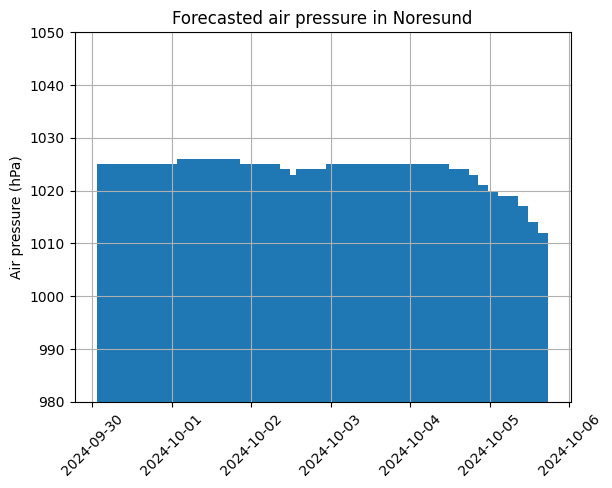

In [24]:
import matplotlib.pyplot as plt
plt.bar(timestamps, pressures)
plt.xticks(rotation=45)
plt.ylim(980, 1050)
plt.grid()
plt.ylabel("Air pressure (hPa)")
plt.title(f"Forecasted air pressure in {CITY}")
plt.show()

## Exercise
- Make a new forecast request for your own hometown. Call your response something else than responseF.
- If available, plot the humidity like we did with air pressure.

### Precipitation
- ... comes in two main flavours: rain and snow.
- We need to check which is present and set to zero if it is abscent.

In [35]:
rain = []
snow = []
for forecast in responseF["list"]:
    try: # Check if rain is present in forecast
        rain.append(forecast["rain"]["3h"])
    except KeyError:
        rain.append(0)
    try: # Check if snow is present in forecast
        snow.append(forecast["snow"]["3h"])
    except KeyError:
        snow.append(0)

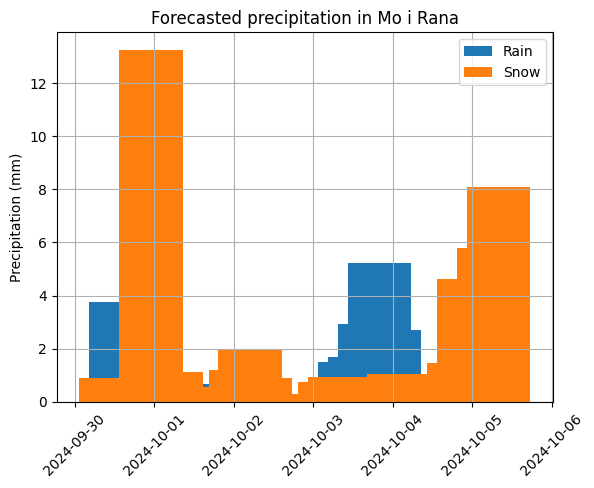

In [36]:
# Stacked bar chart with rain and snow
plt.bar(timestamps, rain, label="Rain")
plt.bar(timestamps, snow, label="Snow")
plt.xticks(rotation=45)
plt.grid()
plt.ylabel("Precipitation (mm)")
plt.title(f"Forecasted precipitation in {CITY}")
plt.legend()
plt.show()


```{seealso} Resources
:class: tip
- [YouTube: NeuralNine's video (15m:32s)](https://www.youtube.com/watch?v=9P5MY_2i7K8)
```